In [2]:
import re

import pandas as pd
chars_to_remove = ['.', '-', '(', ')', '@', '/']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", 100)

Necessário excluir as 2 últimas linhas do arquivo para evitar 2 linhas nulas. das bases de 2009 até 2011.
A base de 2018 possui algumas colunas 'nome fantasia' que possuem ';' como separador de empresas e que
consequentemente atrapalham na leitura dos dados pois alteram a quantidade de colunas finais.
Sendo necessário a modificação por linha manual (18 linhas no total)

In [3]:
rec2009 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2009.csv",header=0,encoding="ISO-8859-9",delimiter=";", dtype="str")
rec2010 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2010.csv",header=0,encoding="ISO-8859-9",delimiter=";", dtype="str")
rec2011 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2011.csv",header=0,encoding="ISO-8859-9",delimiter=";", dtype="str")
rec2012 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2012.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2013 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2013.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2014 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2014.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2015 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2015.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2016 = pd.read_csv("../data/reclamacoes-fundamentadas-sindec-2016_v2.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2017 = pd.read_csv("../data/CNRF_2017.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")
rec2018 = pd.read_csv("../data/CNRF2018.csv",header=0,encoding="UTF-8",delimiter=";", dtype="str")

In [4]:
rec2009 = rec2009.rename(columns={
    "anocalendario": "AnoCalendario",
    "codigoregiao": "CodigoRegiao",
    "regiao": "Regiao",
    "radicalCNPJ": "RadicalCNPJ"})


In [5]:
rec2010 = rec2010.rename(columns={
    "anocalendario": "AnoCalendario",
    "codigoregiao": "CodigoRegiao",
    "regiao": "Regiao",
    "radicalCNPJ": "RadicalCNPJ"})

In [6]:
rec2011 = rec2011.rename(columns={
    "anocalendario": "AnoCalendario",
    "codigoregiao": "CodigoRegiao",
    "regiao": "Regiao",
    "radicalCNPJ": "RadicalCNPJ"})

In [7]:
rec2012.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [8]:
rec2013.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [9]:
rec2014.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [10]:
rec2015.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [11]:
rec2016.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [12]:
rec2017.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [13]:
rec2018.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')

In [14]:
frames = [rec2009,rec2010,rec2011,rec2012,rec2013,rec2014,rec2015,rec2016,rec2017,rec2018]

In [15]:
df = pd.concat(frames)


A união de todas as tabelas deu 1.668.061 linhas com 23 colunas.


In [16]:
df

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2009,2009-01-21 15:29:29.000,2005-07-06 08:32:23.000,5,Centro-oeste,GO,CBP SUL - COLCHÕES E ESPUMAS INDUSTRIAIS LTDA,LIMANSKY,1,1350934000116,1350934,CBP SUL - COLCHOES E ESPUMAS INDUSTRIAIS LTDA,NaN,3104700,FABRICAÇÃO DE COLCHÕES,S,100,Colchão,105,Produto entregue com danos/defeitos,M,entre 61 a 70 anos,74680330
1,2009,2009-05-12 12:05:08.000,2006-01-17 12:10:53.000,3,Sudeste,RJ,GRADIENTE,NaN,1,43185362001936,43185362,IGB ELETRONICA S.A,NaN,2640000,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃO, GRAVAÇÃO E AMPLIFICAÇÃO DE ÁUDIO E VÍDEO",N,146,Aparelho DVD,107,Não entrega/demora na entrega do produto,F,entre 51 a 60 anos,23510240
2,2009,2009-04-23 08:52:31.000,2005-07-06 11:28:47.000,5,Centro-oeste,GO,IGL INDÚSTRIA LTDA,ELIDA PONDS INDUSTRIAL LTDA,1,3085759000102,3085759,UNILEVER BRASIL HIGIENE PESSOAL E LIMPEZA LTDA,ELIDA PONDS INDUSTRIAL LTDA.,2063100,"FABRICAÇÃO DE COSMÉTICOS, PRODUTOS DE PERFUMARIA E DE HIGIENE PESSOAL",N,224,Produto Para Uso Veterinário ( Medicamento / Sabonete / Shampoo ),177,Presença de sujidades/corpos estranhos,F,entre 21 a 30 anos,74775010
3,2009,2009-04-23 08:52:31.000,2005-07-06 11:28:47.000,5,Centro-oeste,GO,UNILEVER BESTFOODS BRASIL LTDA,UNILEVER,1,1615814002066,1615814,UNILEVER BRASIL INDUSTRIAL LTDA,NaN,1031700,FABRICAÇÃO DE CONSERVAS DE FRUTAS,N,224,Produto Para Uso Veterinário ( Medicamento / Sabonete / Shampoo ),177,Presença de sujidades/corpos estranhos,F,entre 21 a 30 anos,74775010
4,2009,2009-07-23 11:57:40.000,2006-01-18 15:35:29.000,3,Sudeste,RJ,EMPRESA BRASILEIRA DE TELECOMUNICAÇÕES S.A,EMBRATEL - LIVRE,1,33530486000129,33530486,EMPRESA BRASILEIRA DE TELECOMUNICACOES S A EMBRATEL,NaN,6110899,SERVIÇOS DE TELECOMUNICAÇÕES POR FIO NÃO ESPECIFICADOS ANTERIORMENTE,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),143,Contrato - Rescisão/alteração unilateral,F,entre 41 a 50 anos,20710270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39055,2018,2018-05-29 14:19:32.000,2017-01-30 14:46:11.000,3,Sudeste,MG,BANCO LOSANGO S.A - BANCO MULTIPLO,NaN,1,33254319000100,33254319,HSBC FINANCE (BRASIL) S.A. - BANCO MULTIPLO,NaN,6431000,"BANCOS MÚLTIPLOS, SEM CARTEIRA COMERCIAL",S,54,Cartão de Crédito,NaN,NaN,F,entre 61 a 70 anos,35180144
39056,2018,2018-06-06 13:38:04.000,2018-04-09 08:39:46.000,3,Sudeste,MG,MERCADOLIVRE.COM ATIVIDADES DE INTERNET LTDA,MERCADO LIVRE,1,3361252000134,3361252,MERCADOLIVRE.COM ATIVIDADES DE INTERNET LTDA,NaN,7490104,"ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE SERVIÇOS E NEGÓCIOS EM GERAL, EXCETO IMOBILIÁRIOS",S,106,"Artigo de Leitura ( Formal, Jornal, Revista, Folheto, Livros, Etc. )",NaN,NaN,F,até 20 anos,90035030
39057,2018,2018-03-23 14:45:20.000,2018-02-23 16:37:15.000,2,Nordeste,RN,ACBZ IMPORTACAO E COMERCIO LTDA.,ASUS NO BRASIL,1,9509531000189,9509531,ACBZ IMPORTACAO E COMERCIO LTDA.,NaN,4651601,COMÉRCIO ATACADISTA DE EQUIPAMENTOS DE INFORMÁTICA,N,101,"Telefone ( Convencional, Celular, Interfone, Etc. )",NaN,NaN,F,entre 21 a 30 anos,59115110
39058,2018,2018-04-09 11:41:30.000,2018-02-27 11:40:27.000,2,Nordeste,RN,NET SERVIÇOS DE COMUNICAÇÃO S/A,NET,1,108786018889,108786,NET SERVICOS DE COMUNICACAO S/A,NaN,8299799,OUTRAS ATIVIDADES DE SERVIÇOS PRESTADOS PRINCIPALMENTE ÀS EMPRESAS NÃO ESPECIFICADAS ANTERIORMENTE,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),NaN,NaN,F,entre 61 a 70 anos,59073101


In [17]:
def view_df_stats(df):
    print("Shape of df={}".format(df.shape))
    print("Number of index levels:{}".format(df.index.nlevels))
    for i in range(df.index.nlevels):
        print("For index level {},unique values count={}".format(i,df.index.get_level_values(i).unique().shape[0]))
    print("Columns of df={}".format(df.columns))
    print("Null count= \n {}".format(df.isnull().sum()))
    print(df.describe())


In [18]:
view_df_stats(df)


Shape of df=(1668061, 23)
Number of index levels:1
For index level 0,unique values count=268096
Columns of df=Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')
Null count= 
 AnoCalendario                 0
DataArquivamento             20
DataAbertura                  7
CodigoRegiao                  0
Regiao                        0
UF                            0
strRazaoSocial               11
strNomeFantasia          267963
Tipo                          0
NumeroCNPJ                71583
RadicalCNPJ               73166
RazaoSocialRFB            93932
NomeFantasiaRFB          912164
CNAEPrincipal

In [19]:
df[(df['CEPConsumidor'].isnull())].groupby("AnoCalendario").count()

,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
AnoCalendario,,,,,,,,,,,,,,,,,,,,,,
2009,9824,9824,9824,9824,9824,9824,8025,9824,9304,9297,9285,4643,9285,9269,9824,9824,9824,9824,9824,9824,9824,0
2010,11725,11725,11725,11725,11725,11725,9809,11725,11175,11157,11138,5696,11138,10920,11725,11725,11725,11725,11725,11725,11725,0
2011,9162,9162,9162,9162,9162,9162,7964,9162,8824,8810,8798,4461,8798,8614,9162,9162,9162,9162,9162,9162,9162,0
2012,13906,13906,13906,13906,13906,13906,11661,13906,13240,13162,13151,6323,13151,12851,13906,13906,13906,13906,13906,13906,13906,0
2013,18667,18667,18667,18667,18667,18667,15131,18667,17996,17996,17897,8798,17552,17552,18667,18667,18667,18667,18667,18667,18667,0
2014,17936,17936,17936,17936,17936,17936,15002,17936,17176,17137,17045,8851,17045,16769,17936,17936,17936,17936,17936,17936,17936,0
2015,18211,18211,18211,18211,18211,18211,15148,18211,17153,17153,16809,8856,16809,16614,18211,18211,18211,18210,18210,18211,18211,0
2016,14086,14086,14086,14086,14086,14086,11988,14086,13289,13289,12761,6688,12761,12657,14086,14086,14086,14086,14086,14086,14086,0
2017,4696,4696,4702,4702,4702,4702,4057,4702,4364,4364,4093,2245,4093,4062,4702,4702,4702,3582,3582,4693,4702,0


Verificando que o número de CEPs que são vazios é de 120.078 e que isso representa
 7,20% da base não é uma perda muito significativa que compromenta o estudo de caso.
 Dos 7,20%

 | Ano Calendario | Linhas |
 |----------------|--------|
 | 2009           | 9824   |
 | 2010           | 11725  |
 | 2011           | 9162   |
 | 2012           | 13906  |
 | 2013           | 18667  |
 | 2014           | 17936  |
 | 2015           | 18211  |
 | 2016           | 14086  |
 | 2017           | 4696   |
 | 2018           | 1858   |


In [20]:
df2 = df.dropna(subset=["CEPConsumidor"])

In [21]:
view_df_stats(df2)

Shape of df=(1547983, 23)
Number of index levels:1
For index level 0,unique values count=268029
Columns of df=Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')
Null count= 
 AnoCalendario                 0
DataArquivamento             13
DataAbertura                  0
CodigoRegiao                  0
Regiao                        0
UF                            0
strRazaoSocial               11
strNomeFantasia          248230
Tipo                          0
NumeroCNPJ                65832
RadicalCNPJ               67250
RazaoSocialRFB            86491
NomeFantasiaRFB          849508
CNAEPrincipal

Antes da remoção dos CEPs nulos, o ano que possuia mais reclamações
era o de 2013 com 268.096 registros,após a remoção passou a ser o
de 2014 o que possui mais reclamações com 249.828 registros.
Assim como passou a ter somente 65.832 empresas sem o CNPJ
que antes era de 71.583

Próxima etapa será de buscar o radical do CNPJ das empresas que não possuem o CNPJ.
Como não se pode inferir o número do CNPJ pelo nome, pois pode ser uma outra filial
da empresa

In [22]:
df2[df2['NumeroCNPJ'].isnull()].groupby(['AnoCalendario']).agg({'AnoCalendario':'count'})

,AnoCalendario
AnoCalendario,
2009,5325
2010,4346
2011,4176
2012,9535
2013,10369
2014,10011
2015,11290
2016,7397
2017,2117


O ano em que mais possui CNPJ nulos é em 2015 com 11.290 registros


In [23]:
df[(df['RadicalCNPJ'] == "33000118")]['strRazaoSocial'].unique()

array(['TELEMAR NORTE LESTE S/A', 'OI MÓVEL', 'TELEMAR NORTE E LESTE S/A',
       'OI FIXO', 'TELEMAR NORTE LESTE S/A (OI FIXA)',
       'TELEMAR NORTE LESTE S.A.', 'TELEMAR NORTE LESTE S/A - OI FIXO',
       'TELEMAR NORTE LESTE S/A.', 'TELEMAR NORTE LESTE S/A OI',
       'TELEMAR NORTE LESTE SA', 'TELEMAR NORTE LESTE',
       'OI FIXO - TELEMAR NORTE LESTE S/A',
       'TELEMAR NORTE LESTE S/A (OI FIXO)', 'OI CELULAR S/A - OI MÓVEL',
       'OI - TELEMAR NORTE LESTE S/A', 'TELEMAR NORTE LESTE S.A',
       'TELEMAR NORTE LEST S/A', 'TELEMAR NORTE LESTE S/A / OI FIXO',
       'OI', 'OI S/A KENNEDY NORONHA TERENCE',
       'OI - TELEMAR NORTE LESTE S/A, OI S/A, ÓI MÓVEL S/A',
       'TELEMAR NORTE LESTE S/A  OI DESATIVADO VIDE OI S/A',
       'TELEMAR N LESTE S/A - OI - DESATIVADO VIDE OI S/A',
       'TELEMAR EMPRESA DE TELEFONIA  FIXA',
       'TELEMAR NORTE LESTE S/A - OI',
       'OPERADORA OI FIXO - TELEMAR NORTE LESTE',
       'OI TELEMAR NORTE LESTE S.A', 'TELEMAR NORTE LESTE S/A

Diversas empresas possuem razões sociais com o mesmo radical de CNPJ porém com nomes diferentes, enquanto que na base da RFB estes
possuem o mesmo valor. Para aqueles que possuem valor na base da RFB como únicos será utilizado o mesmo como razão social.

Para aprimorar a limpeza dos dados será removidos os caracteres que estão incluidos no SA tais como [.,/,-,@]

In [24]:
df2['strRazaoSocial'] = df2['strRazaoSocial'].str.strip().replace(regular_expression, '', regex=True)

<ipython-input-24-7c798e4dd206>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['strRazaoSocial'] = df2['strRazaoSocial'].str.strip().replace(regular_expression, '', regex=True)


In [25]:
df2[df2['RazaoSocialRFB'].isnull()].groupby("RadicalCNPJ").agg({'AnoCalendario':'count'}).sort_values("AnoCalendario", ascending=False)

,AnoCalendario
RadicalCNPJ,
40432544,2300
07170938,533
06123835,187
19304719,184
33041260,178
...,...
20953900,1
20953118,1
13239346,1


In [26]:
df2[(df2['RadicalCNPJ'] == "33000118")]['RazaoSocialRFB'].unique()

array(['TELEMAR NORTE LESTE S/A'], dtype=object)

In [27]:
df2[(df2['RadicalCNPJ'] == "33000118")]['strRazaoSocial'].unique()

array(['TELEMAR NORTE LESTE SA', 'OI MÓVEL', 'OI FIXO',
       'TELEMAR NORTE E LESTE SA', 'TELEMAR NORTE LESTE SA OI FIXA',
       'TELEMAR NORTE LESTE SA  OI FIXO', 'TELEMAR NORTE LESTE SA OI',
       'TELEMAR NORTE LESTE', 'OI FIXO  TELEMAR NORTE LESTE SA',
       'TELEMAR NORTE LESTE SA OI FIXO', 'OI CELULAR SA  OI MÓVEL',
       'OI  TELEMAR NORTE LESTE SA', 'TELEMAR NORTE LEST SA', 'OI',
       'OI SA KENNEDY NORONHA TERENCE',
       'OI  TELEMAR NORTE LESTE SA, OI SA, ÓI MÓVEL SA',
       'TELEMAR NORTE LESTE SA  OI DESATIVADO VIDE OI SA',
       'TELEMAR N LESTE SA  OI  DESATIVADO VIDE OI SA',
       'TELEMAR EMPRESA DE TELEFONIA  FIXA', 'TELEMAR NORTE LESTE SA  OI',
       'OPERADORA OI FIXO  TELEMAR NORTE LESTE',
       'OI TELEMAR NORTE LESTE SA', 'TELEMAR NORTE LESTE SAOI FIXO',
       'TELEMAR SA', 'TELEMAR NORTE LESTE SA  EM RECUPERAÇÃO JUDICIAL',
       'GRUPO OI', 'TELEMAR NORTE LESTE SA ',
       'OITELEMARTELECOMUNICAÇÕES DO RIO DE JANEIRO SA'], dtype=object)

In [28]:
df2[(df2['RadicalCNPJ'] == "33000118")]

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
256,2009,2008-09-16 09:29:35.000,2006-12-28 11:34:55.000,1,Norte,AP,TELEMAR NORTE LESTE SA,OI,1,33000118000683,33000118,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),134,Cobrança indevida/abusiva,M,entre 31 a 40 anos,68906000
502,2009,2008-09-09 12:03:00.000,2007-01-29 09:03:51.000,1,Norte,PA,TELEMAR NORTE LESTE SA,OI FIXA,1,33000118000926,33000118,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),134,Cobrança indevida/abusiva,F,entre 51 a 60 anos,67200000
590,2009,2008-10-23 12:35:09.000,2006-11-16 14:12:34.000,3,Sudeste,RJ,TELEMAR NORTE LESTE SA,OI TELEFONIA FIXA,1,33000118000179,33000118,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,N,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),134,Cobrança indevida/abusiva,F,entre 31 a 40 anos,21361150
778,2009,2009-03-03 14:52:00.000,2005-06-13 14:26:27.000,1,Norte,PA,TELEMAR NORTE LESTE SA,OI FIXA,1,33000118000926,33000118,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,N,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),134,Cobrança indevida/abusiva,M,entre 41 a 50 anos,67133050
1480,2009,2008-09-24 09:09:18.000,2007-09-17 17:21:06.000,3,Sudeste,ES,TELEMAR NORTE LESTE SA,OI FIXO/OI MOVEL/OI VELOX,1,33000118000250,33000118,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,N,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),134,Cobrança indevida/abusiva,F,entre 51 a 60 anos,29090040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38975,2018,2018-09-04 14:54:12.000,2018-02-15 09:56:20.000,3,Sudeste,MG,TELEMAR NORTE E LESTE SA,"TELEMAR (OI FIXO E MÓVEL, OI PAGGO, VELOX, OI NET)",1,33000118000330,33000118,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,101,"Telefone ( Convencional, Celular, Interfone, Etc. )",NaN,NaN,M,entre 41 a 50 anos,35051350
38980,2018,2018-12-10 16:40:43.000,2018-11-07 11:00:49.000,3,Sudeste,MG,TELEMAR NORTE E LESTE SA,"TELEMAR (OI FIXO E MÓVEL, OI PAGGO, VELOX, OI NET)",1,33000118000330,33000118,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,187,Telefonia Celular,NaN,NaN,F,entre 61 a 70 anos,35057710
38981,2018,2018-12-10 16:44:47.000,2018-10-31 14:30:52.000,3,Sudeste,MG,TELEMAR NORTE E LESTE SA,"TELEMAR (OI FIXO E MÓVEL, OI PAGGO, VELOX, OI NET)",1,33000118000330,33000118,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),NaN,NaN,F,entre 61 a 70 anos,35010210
39030,2018,2018-10-04 09:01:09.000,2018-09-13 08:57:39.000,3,Sudeste,MG,TELEMAR NORTE E LESTE SA,"TELEMAR (OI FIXO E MÓVEL, OI PAGGO, VELOX, OI NET)",1,33000118000330,33000118,TELEMAR NORTE LESTE S/A,OI,6110801,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,186,Telefonia Fixa ( Plano de Expansão / Compra e Venda / Locação ),NaN,NaN,F,entre 21 a 30 anos,35053210


In [29]:
df2[(df2['strRazaoSocial'] == "BANCO DO BRASIL")]['RadicalCNPJ'].unique()

array(['0', nan, '28196889', '00000000', '00655522', '68181221',
       '06043050'], dtype=object)

Analisando a consulta pelos radicais de CNPJ, pode-se notar que Razão Social das empresas muitas vezes vem com diferentes escritas.


Algumas empresas possuem a mesma razão social porém com radicais de CNPJ distintos, tais como a
"TELEMAR NORTE LESTE S/A", "BANCO DO BRASIL", "CAIXA ECONÔMICA FEDERAL"


In [30]:
df2[(df2['RadicalCNPJ'] == "0")]['RazaoSocialRFB'].unique()

array(['BANCO DO BRASIL SA'], dtype=object)

Foi considerado utilizar a RazaoSocialRFB como strRazaoSocial, porém todos os campos que estão nulos na strRazaoSocial também estão vazios na
RazaoSocialRFB/NumeroCNPJ/RadicalCNPJ, portanto nenhum deles é possível constatar qual a empresa que está sendo reclamada. Consequentemente estes
serão removidos da base, pois não agregam valor aos dados. Que no total são 11 linhas

In [31]:
df3 = df2.dropna(subset=["strRazaoSocial"])

In [32]:
view_df_stats(df3)

Shape of df=(1547972, 23)
Number of index levels:1
For index level 0,unique values count=268029
Columns of df=Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor'],
      dtype='object')
Null count= 
 AnoCalendario                 0
DataArquivamento             13
DataAbertura                  0
CodigoRegiao                  0
Regiao                        0
UF                            0
strRazaoSocial                0
strNomeFantasia          248219
Tipo                          0
NumeroCNPJ                65821
RadicalCNPJ               67239
RazaoSocialRFB            86480
NomeFantasiaRFB          849497
CNAEPrincipal

In [33]:
df3[df3['NumeroCNPJ'].isnull()]['strRazaoSocial'].unique()

array(['BOA FORMA MOVEIS', 'ELETRÔNICA AMAPÁ', 'SONOREM', ..., 'MASTER',
       'ALEXANDRE PEDREIRO', 'JEAN CARLOS'], dtype=object)

Plot Faixa etária por quantidade de reclamações.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

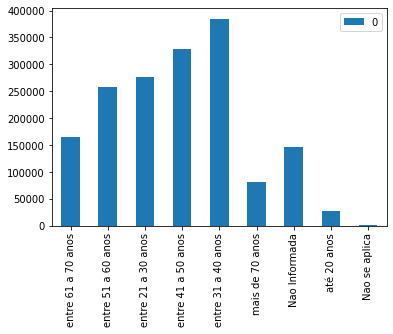

In [34]:
from collections import Counter
age_counter = Counter(df['FaixaEtariaConsumidor'])
df = pd.DataFrame.from_dict(age_counter, orient='index')
df.plot(kind='bar')

In [81]:
dfceps = pd.read_csv("../data/ceps.csv", header=0, encoding="UTF-8", delimiter="\t", dtype="str")

In [ ]:
view_df_stats(dfceps)

A tabela unificada que foi criada através da base dos CEPs foi gerada com as cidades e UFs na mesma colunas
separadas por '/' foi necessário separar ambos e inserir em 2 colunas separadas para simplificar as análises

In [82]:
dfceps.cidadeEstado.str.split("/", expand=True)

,0,1
0,São Paulo,SP
1,São Paulo,SP
2,São Paulo,SP
3,São Paulo,SP
4,São Paulo,SP
...,...,...
732758,São João Bosco (Ciríaco),RS - Distrito
732759,Cruzaltinha (Ciríaco),RS - Distrito
732760,David Canabarro,RS
732761,David Canabarro,RS


In [83]:
dfceps[['cidade','estado']] = dfceps.cidadeEstado.str.split("/", expand=True)

In [84]:
dfceps['estado'].unique()

array(['SP', 'SP  - Distrito', 'SP  - Povoado', 'RJ', 'RJ  - Distrito',
       'RJ  - Povoado', 'ES', 'ES  - Distrito', 'ES  - Povoado', 'MG',
       'MG  - Distrito', 'MG  - Povoado', 'BA', 'BA  - Distrito',
       'BA  - Povoado', 'SE', 'SE  - Distrito', 'PE', 'PE  - Povoado',
       'PE  - Distrito', 'AL', 'AL  - Povoado', 'AL  - Distrito', 'PB',
       'PB  - Distrito', 'PB  - Povoado', 'RN', 'RN  - Distrito',
       'RN  - Povoado', 'CE', 'CE  - Distrito', 'CE  - Povoado', 'PI',
       'PI  - Povoado', 'MA', 'MA  - Distrito', 'MA  - Povoado', 'PA',
       'PA  - Distrito', 'PA  - Povoado', 'AP', 'AP  - Povoado',
       'AP  - Distrito', 'AM', 'AM  - Distrito', 'AM  - Povoado', 'RR',
       'RR  - Distrito', 'AC', 'AC  - Distrito', 'DF', 'GO',
       'GO  - Distrito', 'GO  - Povoado', 'RO', 'RO  - Distrito',
       'RO  - Povoado', 'TO', 'TO  - Distrito', 'TO  - Povoado', 'MT',
       'MT  - Povoado', 'MT  - Distrito', 'MS', 'MS  - Distrito', 'PR',
       'PR  - Povoado', 'PR  - Di

Algumas UFs estão constatando como "- Povoado" e "- Distrito",
sendo necessária a remoção desses dados para a unificação das UFs

In [85]:
dfceps['estado'] = dfceps['estado'].str.replace("  - Povoado","")
dfceps['estado'] = dfceps['estado'].str.replace("  - Distrito","")
dfceps['estado'].unique()

array(['SP', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB', 'RN', 'CE',
       'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'AC', 'DF', 'GO', 'RO', 'TO',
       'MT', 'MS', 'PR', 'SC', 'RS'], dtype=object)

In [90]:
dfceps.head()

,CEP,cidadeEstado,bairro,rua,complemento,cidade,estado
0,01001000,São Paulo/SP,Sé,Praça da Sé - lado ímpar,NaN,São Paulo,SP
1,01001001,São Paulo/SP,Sé,Praça da Sé - lado par,NaN,São Paulo,SP
2,01001010,São Paulo/SP,Sé,Rua Filipe de Oliveira,NaN,São Paulo,SP
3,01001900,São Paulo/SP,Sé,"Praça da Sé, 108",UNESP - Universidade Estadual Júlio de Mesquita Filho,São Paulo,SP
4,01001901,São Paulo/SP,Sé,"Praça da Sé, 371",Edifício Santa Lídia,São Paulo,SP


In [91]:
joinDF = pd.merge(df3,dfceps,left_on="CEPConsumidor", right_on="CEP")

In [92]:
joinDF

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,CEP,cidadeEstado,bairro,rua,complemento,cidade,estado
0,2009,2009-01-21 15:29:29.000,2005-07-06 08:32:23.000,5,Centro-oeste,GO,CBP SUL COLCHÕES E ESPUMAS INDUSTRIAIS LTDA,LIMANSKY,1,1350934000116,1350934,CBP SUL - COLCHOES E ESPUMAS INDUSTRIAIS LTDA,NaN,3104700,FABRICAÇÃO DE COLCHÕES,S,100,Colchão,105,Produto entregue com danos/defeitos,M,entre 61 a 70 anos,74680330,74680330,Goiânia/GO,Residencial Aldeia do Vale,Alameda das Mangubas,NaN,Goiânia,GO
1,2009,2009-01-21 15:29:29.000,2005-07-06 08:32:23.000,5,Centro-oeste,GO,NETUNO INDÚSTRIA E COMÉRCIO LTDA,NETUNO,1,1673680000258,1673680,NETUNO INDUSTRIA E COMERCIO LTDA,NaN,4754702,COMÉRCIO VAREJISTA DE ARTIGOS DE COLCHOARIA,S,100,Colchão,105,Produto entregue com danos/defeitos,M,entre 61 a 70 anos,74680330,74680330,Goiânia/GO,Residencial Aldeia do Vale,Alameda das Mangubas,NaN,Goiânia,GO
2,2010,2009-12-01 16:49:51.000,2009-10-07 15:19:55.000,05,Centro-oeste,GO,COMERCIO DE COLCHÕES LTDA,NaN,1,06537671000172,06537671,MX COMERCIO DE COLCHOES LTDA,ORTOBOM,4754702,COMÉRCIO VAREJISTA DE ARTIGOS DE COLCHOARIA,S,100,Colchão,102,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,74680330,74680330,Goiânia/GO,Residencial Aldeia do Vale,Alameda das Mangubas,NaN,Goiânia,GO
3,2010,2009-10-15 17:32:18.000,2009-07-29 15:46:10.000,05,Centro-oeste,GO,SONY ERICSSON MOBILE COMMUNICATIONS DO BRASIL LTDA,TELEFONE CELULAR,1,04667337000108,04667337,SONY ERICSSON MOBILE COMMUNICATIONS DO BRASIL LTDA.,NaN,4652400,COMÉRCIO ATACADISTA DE COMPONENTES ELETRÔNICOS E EQUIPAMENTOS DE TELEFONIA E COMUNICAÇÃO,S,101,"Telefone ( Convencional, Celular, Interfone, Etc. )",102,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,74680330,74680330,Goiânia/GO,Residencial Aldeia do Vale,Alameda das Mangubas,NaN,Goiânia,GO
4,2010,2009-12-01 16:49:51.000,2009-10-07 15:19:55.000,05,Centro-oeste,GO,GOIAS INDUSTRIA E COMERCIO DE COLCHOES E ESPUMAS LTDA,(ORTOBOM FABRICA),1,02748383000297,02748383,GOIAS INDUSTRIA E COMERCIO DE COLCHOES E ESPUMAS LTDA,NaN,3104700,FABRICAÇÃO DE COLCHÕES,S,100,Colchão,102,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,74680330,74680330,Goiânia/GO,Residencial Aldeia do Vale,Alameda das Mangubas,NaN,Goiânia,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053783,2018,2018-12-17 10:29:19.000,2018-11-09 12:38:52.000,3,Sudeste,MG,MAGAZINE LUIZA SA,MAGAZINE LUIZA S/A,1,47960950044927,47960950,MAGAZINE LUIZA S/A,MAGAZINE LUIZA,4713001,LOJAS DE DEPARTAMENTOS OU MAGAZINES,S,122,Móveis Para Quarto,NaN,NaN,F,entre 51 a 60 anos,35043120,35043120,Governador Valadares/MG,Jardim Ipê,Rua Bicuíba,NaN,Governador Valadares,MG
1053784,2018,2018-12-18 14:40:04.000,2018-11-23 08:42:47.000,3,Sudeste,MG,VIA VAREJO SA,"PONTO FRIO, CASAS BAHIA E BARTIRA",1,33041260065290,33041260,VIA VAREJO S/A,NaN,4753900,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉSTICOS E EQUIPAMENTOS DE ÁUDIO E VÍDEO,S,124,Móveis (outros),NaN,NaN,F,entre 41 a 50 anos,35043410,35043410,Governador Valadares/MG,Vila Isa,Rua Ouro Branco,NaN,Governador Valadares,MG
1053785,2018,2018-12-18 14:40:04.000,2018-11-23 08:42:47.000,3,Sudeste,MG,ZURICH MINAS BRASIL SEGUROS SA,MINAS-BRASIL SEGURADORA,1,17197385000121,17197385,ZURICH MINAS BRASIL SEGUROS S.A.,ZURICH SEGUROS,6511101,SEGUROS DE VIDA,S,124,Móveis (outros),NaN,NaN,F,entre 41 a 50 anos,35043410,35043410,Governador Valadares/MG,Vila Isa,Rua Ouro Branco,NaN,Governador Valadares,MG
1053786,2018,2018-08-13 08:50:10.000,2011-12-13 11:09:20.000,2,Nordeste,PB,BANCO ITAU CARD SA CREDICARD CITICARD,CREDICARD / CITICARD,1,17192451000170,17192451,BANCO ITAUCARD S.A.,ITAUCARD FINANCEIRA,6422100,

In [102]:
view_df_stats(joinDF)

Shape of df=(1053788, 30)
Number of index levels:1
For index level 0,unique values count=1053788
Columns of df=Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor', 'CEP',
       'cidadeEstado', 'bairro', 'rua', 'complemento', 'cidade', 'estado'],
      dtype='object')
Null count= 
 AnoCalendario                  0
DataArquivamento               0
DataAbertura                   0
CodigoRegiao                   0
Regiao                         0
UF                             0
strRazaoSocial                 0
strNomeFantasia           183566
Tipo                           0
NumeroCNPJ                 46159
RadicalCNPJ     

Após a uni